<a href="https://colab.research.google.com/github/MorganBaccus/CptS-475/blob/main/CptS_475_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           69301 non-null  object
 1   age          69301 non-null  object
 2   gender       69301 non-null  object
 3   height       69301 non-null  object
 4   weight       69301 non-null  object
 5   ap_hi        69301 non-null  object
 6   ap_lo        69301 non-null  object
 7   cholesterol  69301 non-null  object
 8   gluc         69301 non-null  object
 9   smoke        69301 non-null  object
 10  alco         69301 non-null  object
 11  active       69301 non-null  object
 12  cardio       69301 non-null  object
dtypes: object(13)
memory usage: 6.9+ MB


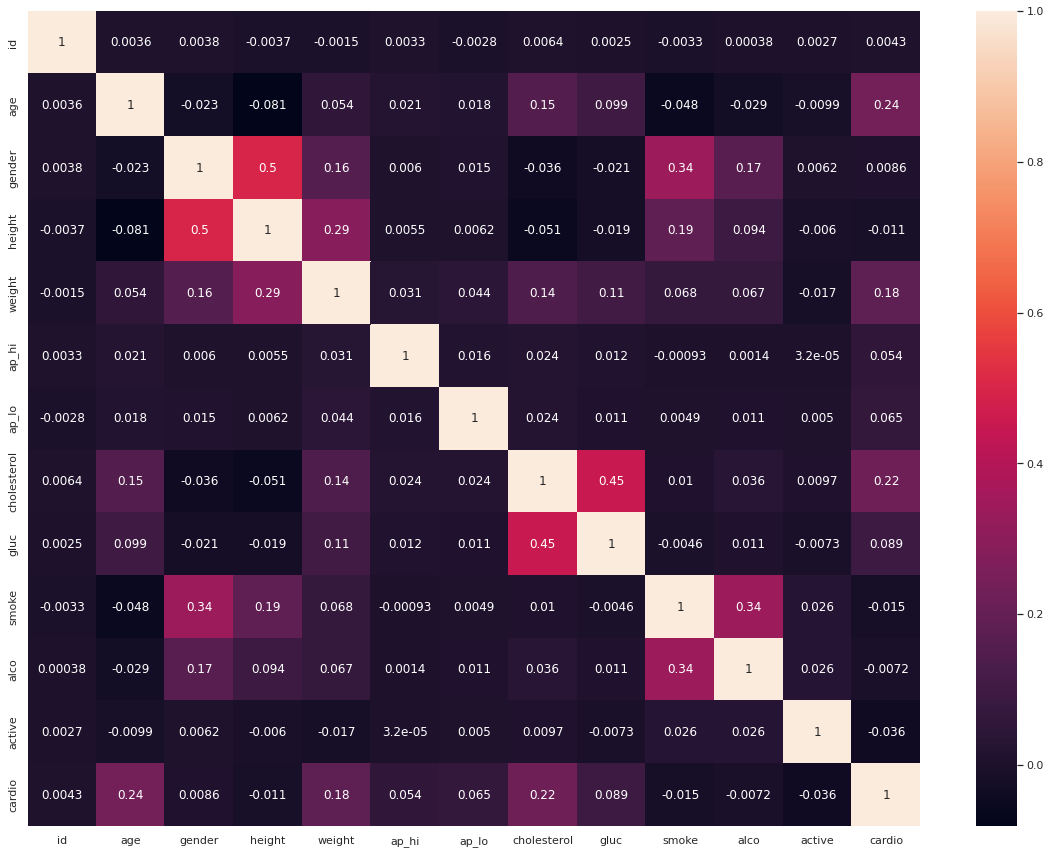

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


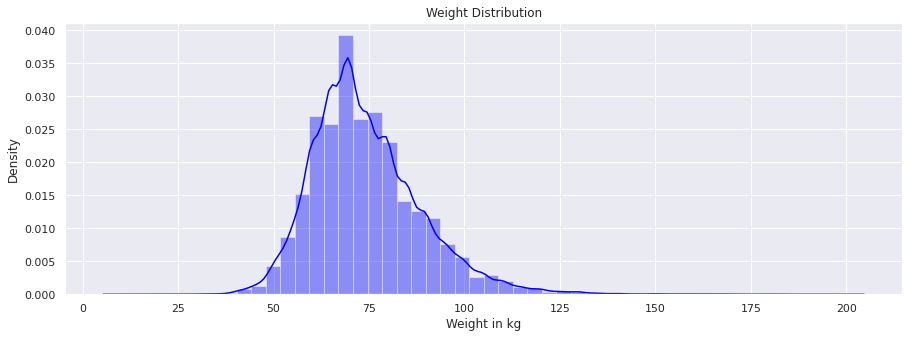

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


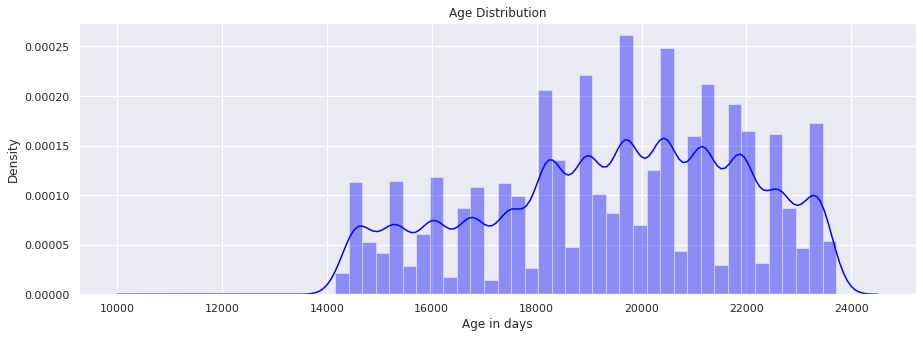

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


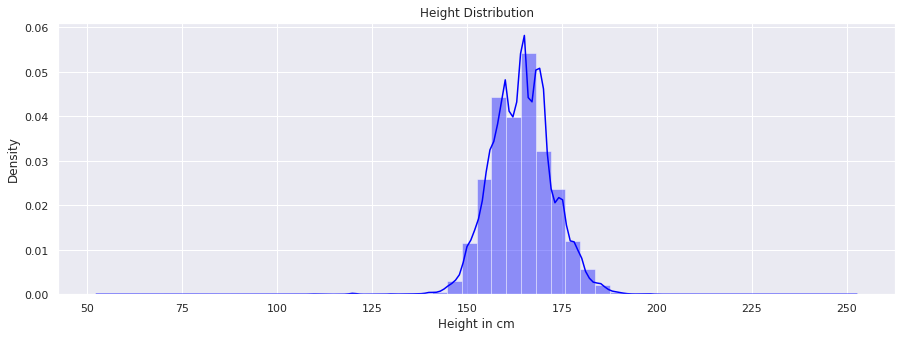

Classifier:  Decision Tree
F1 Score:  0.6390480027127239
Accuracy:  0.6386256873967903
Precision:  0.6418436741539751
Recall:  0.6362766669855544
Cross-Val Score:  0.6380952380952382
Confusion matrix


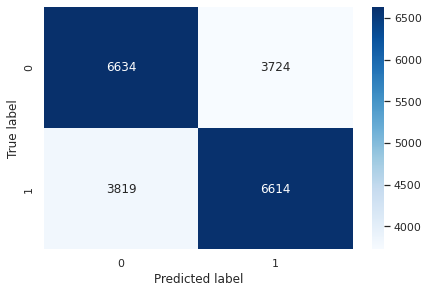



Classifier:  KNN (k=5)
F1 Score:  0.5576675718164927
Accuracy:  0.5534125342696359
Precision:  0.5554184854811159
Recall:  0.5599349469051946
Cross-Val Score:  0.5587920016491446
Confusion matrix


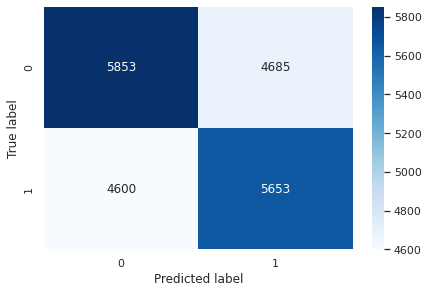



Classifier:  Random Forest Classifier
F1 Score:  0.7339844689666842
Accuracy:  0.7258429127988072
Precision:  0.7165526988061757
Recall:  0.7522880193883733
Cross-Val Score:  0.7231910946196661
Confusion matrix


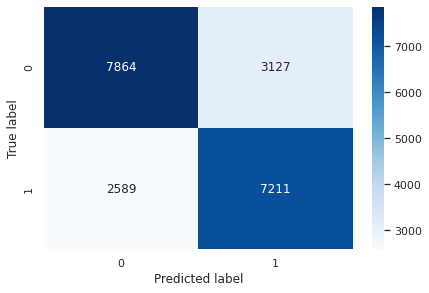



Classifier:  Gaussian Naive Bayes
F1 Score:  0.6918486061796479
Accuracy:  0.6076186811601174
Precision:  0.5716247425254354
Recall:  0.8761121209222232
Cross-Val Score:  0.6011337868480726
Confusion matrix


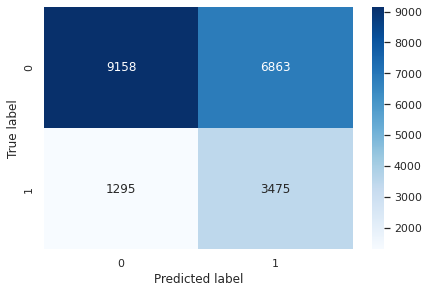



Classifier:  Support Vector Machines
F1 Score:  0.5729829603777458
Accuracy:  0.5998268481554518
Precision:  0.6180932344147935
Recall:  0.5340093752989572
Cross-Val Score:  0.5956916099773243
Confusion matrix


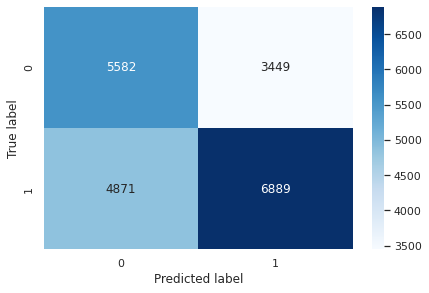





Best F1 Score is:  0.5729829603777458
From the  Decision Tree classifier
Best Cross-Val-Score is:  0.7231910946196661
From the  Random Forest Classifier classifier


Decision Tree ::  T-Statistic =  0.0017277162943699722 P-Value =  0.9987042135850406
KNN (k=5) ::  T-Statistic =  2.4126328794317824 P-Value =  0.07334539560432805
Random Forest Classifier ::  T-Statistic =  -2.8107766430588517 P-Value =  0.048278764873237116
Gaussian Naive Bayes ::  T-Statistic =  -1.562496583248798 P-Value =  0.19320467518784826
Support Vector Machines ::  T-Statistic =  1.9589126305815074 P-Value =  0.12170630009914196


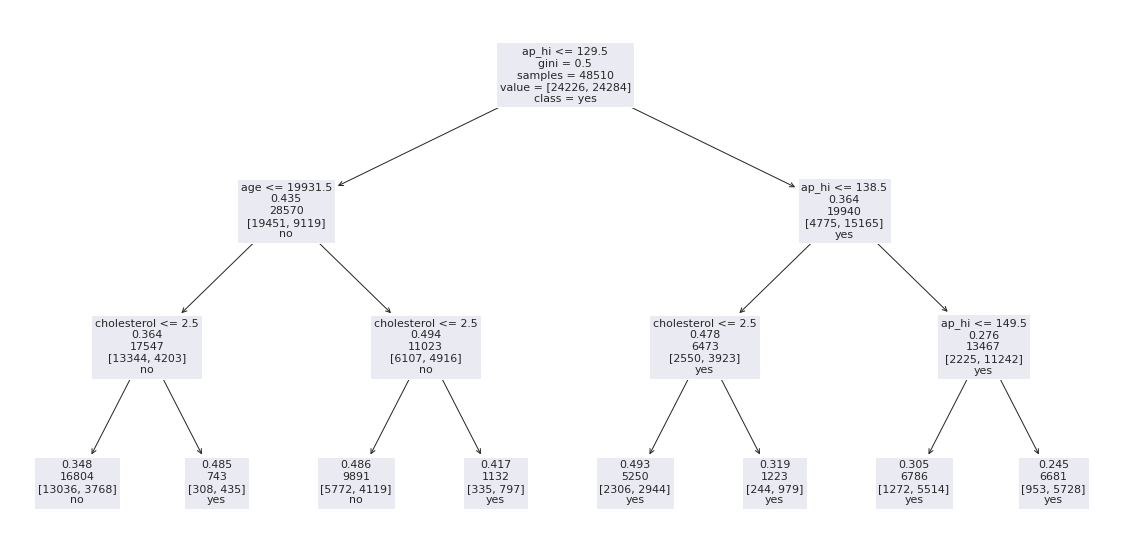

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd 
import os
import itertools
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_1samp

# Read in and clean dataset
not_clean = pd.read_csv('/content/gdrive/My Drive/CptS 475 Project/cardio_data.csv')
heart_disease_data = not_clean.iloc[:,0].apply(lambda x: pd.Series(str(x).split(";")))
heart_disease_data.columns = ["id","age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active",'cardio']

display(heart_disease_data)

# Exploratory data analysis
heart_disease_data.shape
heart_disease_data.info() #69301 entries
heart_disease_data.describe() # 13 columns of non-null data. Data type: object. Uses 6.9+MB of data

# EDA: Heatmap
corrMatrix = heart_disease_data.astype(float).corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# EDA: Bar charts
plt.figure(figsize=(15,5))
sns.distplot(heart_disease_data["weight"], color="blue")
plt.title("Weight Distribution")
plt.ylabel("Density")
plt.xlabel("Weight in kg");
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(heart_disease_data["age"], color="blue")
plt.title("Age Distribution")
plt.ylabel("Density")
plt.xlabel("Age in days");
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(heart_disease_data["height"], color="blue")
plt.title("Height Distribution")
plt.ylabel("Density")
plt.xlabel("Height in cm");
plt.show()


# Confusion matrices
def plot_confusionmatrix(newlabels,y_test):
  print(f'Confusion matrix')
  cf = confusion_matrix(newlabels,y_test)
  classes = ['0', '1']
  sns.heatmap(cf,annot=True,yticklabels=classes
              ,xticklabels=classes,cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Create classifiers for each model
DT_clf = DecisionTreeClassifier(criterion="entropy")
KNN_clf = KNeighborsClassifier()
RF_clf = RandomForestClassifier(n_estimators=100)
NB_clf = GaussianNB()
SVM_clf = SVC()

# Split the data into training and testing sets
y = heart_disease_data.cardio
X = heart_disease_data.drop("cardio", axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

classifiers = [
    (DT_clf, "Decision Tree"),
    (KNN_clf, "KNN (k=5)"),
    (RF_clf, "Random Forest Classifier"),
    (NB_clf, "Gaussian Naive Bayes"),
    (SVM_clf, "Support Vector Machines")
]

# Tracking all F1 scores to determine which algorithm performs best
AllF1 = []
cvs = []

# Training classifiers on the normal dataset
for clf, name in classifiers:
    F1_Scores = []
    acc_scores = []
    prec_scores = []
    rec_scores = []
    print("Classifier: ", name)
    for i in range(3):
      clf.fit(X_train, y_train)
      newlabels = clf.predict(X_test)
      acc_scores.append(metrics.accuracy_score(y_test, newlabels))
      F1_Scores.append(metrics.f1_score(y_test, newlabels, pos_label='0'))
      prec_scores.append(metrics.precision_score(y_test, newlabels, pos_label='0'))
      rec_scores.append(metrics.recall_score(y_test, newlabels, pos_label='0'))
    AllF1.append(np.mean(F1_Scores))
    cv = np.mean(cross_val_score(clf, X_train, y_train))
    cvs.append(cv)
    print("F1 Score: ", np.mean(F1_Scores))
    print("Accuracy: ", np.mean(acc_scores))
    print("Precision: ", np.mean(prec_scores))
    print("Recall: ", np.mean(rec_scores))
    print("Cross-Val Score: ", cv)
    plot_confusionmatrix(newlabels, y_test)
    print("\n")

# Display scores
print("\n\nBest F1 Score is: ", max(F1_Scores))
print("From the ", classifiers[F1_Scores.index(max(F1_Scores))][1], "classifier")

print("Best Cross-Val-Score is: ", max(cvs))
print("From the ", classifiers[cvs.index(max(cvs))][1], "classifier\n\n")

for i in range(len(AllF1)):
    t_score, p_value = ttest_1samp(AllF1, AllF1[i])
    print(classifiers[i][1], "::  T-Statistic = ", t_score, "P-Value = ", p_value)

# Print the Decision Tree
classifier = DecisionTreeClassifier(max_depth=3)
model = classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names = X.columns, class_names = ['no', 'yes'], label='root')
plt.show()
